# Epidemic modelling

An SIR model is a classic epidemic model that can be used to simulate the spread of diseases such as influenza. SIR stands for the three basic stages of an infection

+ S = Susceptible: an individual has not been infected and is susceptible to infection
+ I = Infected: an individual is infected and is transmitting the pathogen to others that come into contact with them
+ R = Recovered: an individual has recovered from the infection. This means the individual is no longer transmitting the pathogen to others and is no longer at risk from being reinfected.

All individuals in a population can be classed as being in one of these stages. So the total population size is N = S + I + R


In the classic SIR model the spread of an infection is controlled by three quantities

1. The number of susceptible people in a population
2. The probability that a susceptible person is in contact with an infected person
3. The probability that the infection is spread to the susceptible person during contact with an infected person.


These three quantities are calculated as:

1. S
2. I / N  this is the probability of picking an infected individual at random from the population. This assumes that infected people are evenly mixed throughout the population (the mass action assumption). 
3. The transmission coefficient (commonly represented as $\beta$) quantifies the probability of an infection being passed on during contact with an infected person.

They can be combined to calculate the number of new infections per unit time

Number of new infections per unit time $= \beta S \frac{I}{N}$

---------


Q1. Below is the skeleton of some python code to simulate and plot an epidemic. The code currently does not correspond to a typical epidemic model, because it assumes that a **fixed proportion** of susceptibles becomes infected every hour. This is captured by the parameter beta (4.7% of susceptibles become infected each hour). 

Modify the code so that it simulates a classic SIR model. In this classic model, the number of new infections per hour should be 4.7% of the **number of susceptibles who come into contact with infected people**. You can assume that infected people are evenly mixed throughout the population of La Gloria (commonly called the mass action principle).



In [59]:
# Model an SIR epidemic

# These model parameters simulate the Swine Flu epidemic from 2009 in La Gloria

N = 1575.0     # Population size [individuals]
beta = 0.047   # Transmission coefficient [per day]
sigma = 0.034  # Recovery rate [per day]
tMax = 24*40   # Maximum time of simulation [hours]

# =========================================
# Set initial conditions
S = [N-1]      # Initial number of susceptibles
I = [1]        # Initial number of infected
R = [0]        # Initial number of recovered
time = [0]     # Initial time [hours]

for t in range(tMax):
    # Calculate the new values of S, I and R one hour
    # into the future
    Snew = S[t] - beta*S[t]
    Inew = I[t] + beta*S[t] - sigma * I[t]
    Rnew = R[t] + sigma * I[t]

    # Add these new values onto the list of values for S, I and R
    time.append((float(t)+1)/24.0)  # Time in days
    S.append(Snew)
    I.append(Inew)
    R.append(Rnew)
    
    

Text(0.5,1,'SIR model')

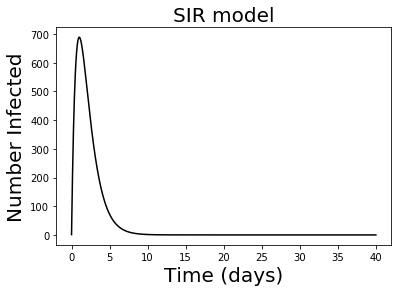

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot number of infected people results
plt.figure(1)
plt.plot(time, I,  '-k')


plt.xlabel('Time (days)', fontsize=20)
plt.ylabel('Number Infected', fontsize=20)
plt.title('SIR model', fontsize=20)

----------
Below is the correct python code:

Text(0.5,1,'Corrected SIR model')

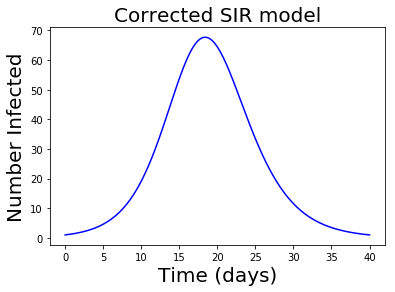

In [61]:
# Model an SIR epidemic

# These model parameters simulate the Swine Flu epidemic from 2009 in La Gloria

N = 1575.0     # Population size [individuals]
beta = 0.047   # Transmission coefficient [per day]
sigma = 0.034  # Recovery rate [per day]
tMax = 24*40   # Maximum time of simulation [hours]



# =========================================
# Set initial conditions
S = [N-1]        # Initial number of susceptibles
I = [1.0]        # Initial number of infected
R = [0.0]        # Initial number of recovered
time = [0.0]     # Initial time [hours]

for t in range(tMax):
    # Calculate the new values of S, I and R one hour
    # into the future
    Snew = S[t] - beta*S[t]*I[t]/N
    Inew = I[t] + beta*S[t]*I[t]/N - sigma * I[t]
    Rnew = R[t] + sigma * I[t]

    # Add these new values onto the list of values for S, I and R
    time.append((float(t)+1)/24.0)  # Time in days
    S.append(Snew)
    I.append(Inew)
    R.append(Rnew)


    
# Plot number of infected people results
plt.figure(2)
plt.plot(time, I,  '-b')


plt.xlabel('Time (days)', fontsize=20)
plt.ylabel('Number Infected', fontsize=20)
plt.title('Corrected SIR model', fontsize=20)

### La Gloria Swine Flu Epidemic

In spring 2009 a new strain of the influenza virus (called novel influenza A (H1N1), or more commonly known as Swine flu) emerged in Mexico, in the town of La Gloria (https://en.wikipedia.org/wiki/2009_swine_flu_pandemic). 

In 2009 the town was estimated to have a population of 1575 people, and the SIR model parameters were estimated to be beta=0.047 and sigma=0.034. 

----

Q2. The number of new infections each day was recorded by GP's the town of La Gloria. The data are in the file la_gloria.csv.

The model of the la Gloria epidemic can be compared to these data. However, there are two corrections which must be applied to the model data:
    
1. Not everyone who became infected went to the doctor. It is estimated that 65% of the people who were infected went to the doctor
    
2. The model calculates numbers of infected people **per hour**, whereas the data calculates numbers of **newly** infected people (new cases) **per day**


Edit the python code below to correctly calculate the model predictions for the number of new cases per day.

Text(0.5,1,'La Gloria Data & Model Prediction')

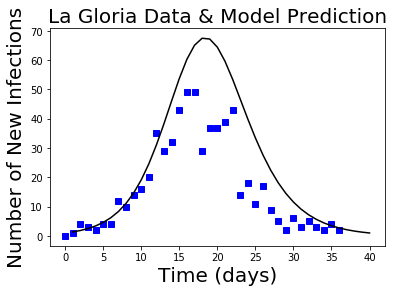

In [62]:
import pandas as pd

# Import the La Gloria data
data = pd.read_csv("la_gloria.csv") 


# Edit this code ------ Start ------

# Use the model results to predict the number of
# new cases over 1 day
model_NewCases = []
model_Time = []
for i in range(24,len(time),24):
    model_NewCases.append(I[i])
    model_Time.append(time[i])

# Edit this code ------ End ------



# Plot the La Gloria data and the model predictions
plt.figure(3)
plt.plot(data['Time'], data['NewCases'],  'sb')
plt.plot(model_Time, model_NewCases, '-k')


plt.xlabel('Time (days)', fontsize=20)
plt.ylabel('Number of New Infections', fontsize=20)
plt.title('La Gloria Data & Model Prediction', fontsize=20)

-------
Correct code

Text(0.5,1,'La Gloria Data & Model Prediction')

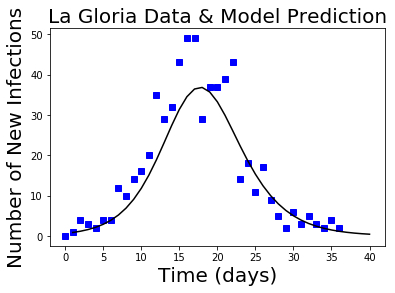

In [63]:
import pandas as pd

# Import the La Gloria data
data = pd.read_csv("la_gloria.csv") 


# Edit this code ------ Start ------

# Use the model results to predict the number of
# new cases over 1 day
model_NewCases = []
model_Time = []
for i in range(24,len(time),24):
    model_NewCases.append(0.65 * (S[i-24] - S[i]))
    model_Time.append(time[i])

# Edit this code ------ End ------



# Plot the La Gloria data and the model predictions
plt.figure(3)
plt.plot(data['Time'], data['NewCases'],  'sb')
plt.plot(model_Time, model_NewCases, '-k')


plt.xlabel('Time (days)', fontsize=20)
plt.ylabel('Number of New Infections', fontsize=20)
plt.title('La Gloria Data & Model Prediction', fontsize=20)